In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import VotingClassifier

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
# loading data

df= pd.read_csv('/content/kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
df.shape

(400, 26)

In [ ]:
# dropping id column
df.drop('id', axis = 1, inplace = True)


In [ ]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
df.describe()


,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

In [ ]:
df['pcv'] = pd.to_numeric(df['pcv'], errors='coerce')
df['wc'] = pd.to_numeric(df['wc'], errors='coerce')
df['rc'] = pd.to_numeric(df['rc'], errors='coerce')

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             329 non-null    float64
 16  wc              294 non-null    float64
 17  rc              269 non-null    flo

In [ ]:
# Extracting categorical and numerical columns

cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [ ]:
# looking at unique values in categorical columns

for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

rbc has [nan 'normal' 'abnormal'] values

pc has ['normal' 'abnormal' nan] values

pcc has ['notpresent' 'present' nan] values

ba has ['notpresent' 'present' nan] values

htn has ['yes' 'no' nan] values

dm has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

cad has ['no' 'yes' '\tno' nan] values

appet has ['good' 'poor' nan] values

pe has ['no' 'yes' nan] values

ane has ['no' 'yes' nan] values

classification has ['ckd' 'ckd\t' 'notckd'] values



In [ ]:
# replace incorrect values

df['dm'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['cad'] = df['cad'].replace(to_replace = '\tno', value='no')

df['classification'] = df['classification'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

<ipython-input-12-7a800921b0f4>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['dm'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)


In [ ]:
df['classification'] = df['classification'].map({'ckd': 0, 'not ckd': 1})
df['classification'] = pd.to_numeric(df['classification'], errors='coerce')

In [ ]:
cols = ['dm', 'cad', 'classification']

for col in cols:
    print(f"{col} has {df[col].unique()} values\n")

dm has ['yes' 'no' nan] values

cad has ['no' 'yes' nan] values

classification has [0 1] values



In [ ]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [ ]:
# checking for null values

df.isna().sum().sort_values(ascending = False)

,0
rbc,152
rc,131
wc,106
pot,88
sod,87
pcv,71
pc,65
hemo,52
su,49
sg,47


In [ ]:
df[num_cols].isnull().sum()

,0
age,9
bp,12
sg,47
al,46
su,49
bgr,44
bu,19
sc,17
sod,87
pot,88


In [ ]:
df[cat_cols].isnull().sum()

,0
rbc,152
pc,65
pcc,4
ba,4
htn,2
dm,2
cad,2
appet,1
pe,1
ane,1


In [ ]:
# filling null values, we will use two methods, random sampling for higher null values and
# mean/mode sampling for lower null values

def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample

def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [ ]:
# filling num_cols null values using random sampling method

for col in num_cols:
    random_value_imputation(col)

In [ ]:
df[num_cols].isnull().sum()

,0
age,0
bp,0
sg,0
al,0
su,0
bgr,0
bu,0
sc,0
sod,0
pot,0


In [ ]:
# filling "red_blood_cells" and "pus_cell" using random sampling method and rest of cat_cols using mode imputation

random_value_imputation('rbc')
random_value_imputation('pc')

for col in cat_cols:
    impute_mode(col)

In [ ]:
df[cat_cols].isnull().sum()

,0
rbc,0
pc,0
pcc,0
ba,0
htn,0
dm,0
cad,0
appet,0
pe,0
ane,0


In [ ]:
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

rbc has 2 categories

pc has 2 categories

pcc has 2 categories

ba has 2 categories

htn has 2 categories

dm has 2 categories

cad has 2 categories

appet has 2 categories

pe has 2 categories

ane has 2 categories

classification has 2 categories



In [ ]:
!pip install category-encoders


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 1.9 MB/s eta 0:00:00


In [ ]:
print(df.columns)


Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,122.0,...,38.0,6000.0,6.3,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,2.9,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0


In [ ]:
ind_col = [col for col in df.columns if col != 'classification']
dep_col = 'classification'

X = df[ind_col]
y = df[dep_col]

In [ ]:
# splitting data intp training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1337)

In [ ]:
# Random Forest (RF)
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)
# Print metrics
print(f"Accuracy: {rf_accuracy:}")
print(f"Precision: {rf_precision:}")
print(f"Recall: {rf_recall:}")
print(f"F1 Score: {rf_f1:}")

# Print detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, rf_predictions))

Accuracy: 0.9625
Precision: 1.0
Recall: 0.8928571428571429
F1 Score: 0.9433962264150944

Classification Report:

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        52
           1       1.00      0.89      0.94        28

    accuracy                           0.96        80
   macro avg       0.97      0.95      0.96        80
weighted avg       0.96      0.96      0.96        80



In [ ]:
# XGBoost (xgb)
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_precision = precision_score(y_test, xgb_predictions)
xgb_recall = recall_score(y_test, xgb_predictions)
xgb_f1 = f1_score(y_test, xgb_predictions)
# Print metrics
print(f"Accuracy: {xgb_accuracy:}")
print(f"Precision: {xgb_precision:}")
print(f"Recall: {xgb_recall:}")
print(f"F1 Score: {xgb_f1:}")

# Print detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, xgb_predictions))

Accuracy: 0.975
Precision: 1.0
Recall: 0.9285714285714286
F1 Score: 0.9629629629629629

Classification Report:

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        52
           1       1.00      0.93      0.96        28

    accuracy                           0.97        80
   macro avg       0.98      0.96      0.97        80
weighted avg       0.98      0.97      0.97        80



In [ ]:
# KNearestNeighbour (knn)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_precision = precision_score(y_test, knn_predictions)
knn_recall = recall_score(y_test, knn_predictions)
knn_f1 = f1_score(y_test, knn_predictions)
# Print metrics
print(f"Accuracy: {knn_accuracy:}")
print(f"Precision: {knn_precision:}")
print(f"Recall: {knn_recall:}")
print(f"F1 Score: {knn_f1:}")

# Print detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, knn_predictions))

Accuracy: 0.5875
Precision: 0.43243243243243246
Recall: 0.5714285714285714
F1 Score: 0.49230769230769234

Classification Report:

              precision    recall  f1-score   support

           0       0.72      0.60      0.65        52
           1       0.43      0.57      0.49        28

    accuracy                           0.59        80
   macro avg       0.58      0.58      0.57        80
weighted avg       0.62      0.59      0.60        80



In [ ]:
# StandardVectorMachine (svm)
svm_model = SVC(class_weight='balanced')
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions)
svm_recall = recall_score(y_test, svm_predictions)
svm_f1 = f1_score(y_test, svm_predictions)
# Print metrics
print(f"Accuracy: {svm_accuracy:}")
print(f"Precision: {svm_precision:}")
print(f"Recall: {svm_recall:}")
print(f"F1 Score: {svm_f1:}")

# Print detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, svm_predictions))

Accuracy: 0.425
Precision: 0.359375
Recall: 0.8214285714285714
F1 Score: 0.5

Classification Report:

              precision    recall  f1-score   support

           0       0.69      0.21      0.32        52
           1       0.36      0.82      0.50        28

    accuracy                           0.42        80
   macro avg       0.52      0.52      0.41        80
weighted avg       0.57      0.42      0.39        80



In [ ]:
# NaiveBayes (nb)
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_precision = precision_score(y_test, nb_predictions)
nb_recall = recall_score(y_test, nb_predictions)
nb_f1 = f1_score(y_test, nb_predictions)
# Print metrics
print(f"Accuracy: {nb_accuracy:}")
print(f"Precision: {nb_precision:}")
print(f"Recall: {nb_recall:}")
print(f"F1 Score: {nb_f1:}")

# Print detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, nb_predictions))

Accuracy: 0.925
Precision: 0.8666666666666667
Recall: 0.9285714285714286
F1 Score: 0.896551724137931

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        52
           1       0.87      0.93      0.90        28

    accuracy                           0.93        80
   macro avg       0.91      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80



In [ ]:
import pickle
# Create instances of the top 3 models
rf_model = RandomForestClassifier()
xgb_model = XGBClassifier()
nb_model = GaussianNB()

# Create a VotingClassifier with the top 3 models
voting_classifier = VotingClassifier(
    estimators=[('rf', rf_model), ('xgb', xgb_model), ('knn', knn_model)],
    voting='hard'  # Use 'hard' voting to let each model vote for the final prediction
)

# Assuming you have your data and labels in X_train, X_test, y_train, y_test
# Fit the voting classifier to the training data
voting_classifier.fit(X_train, y_train)

# Evaluate the voting classifier on the test data
accuracy = voting_classifier.score(X_test, y_test)
print("Ensemble Voting Classifier Accuracy:", accuracy)
with open('voting_classifier.pkl', 'wb') as file:
    pickle.dump(voting_classifier, file)

print("Voting Classifier saved successfully!")

Ensemble Voting Classifier Accuracy: 0.975
Voting Classifier saved successfully!


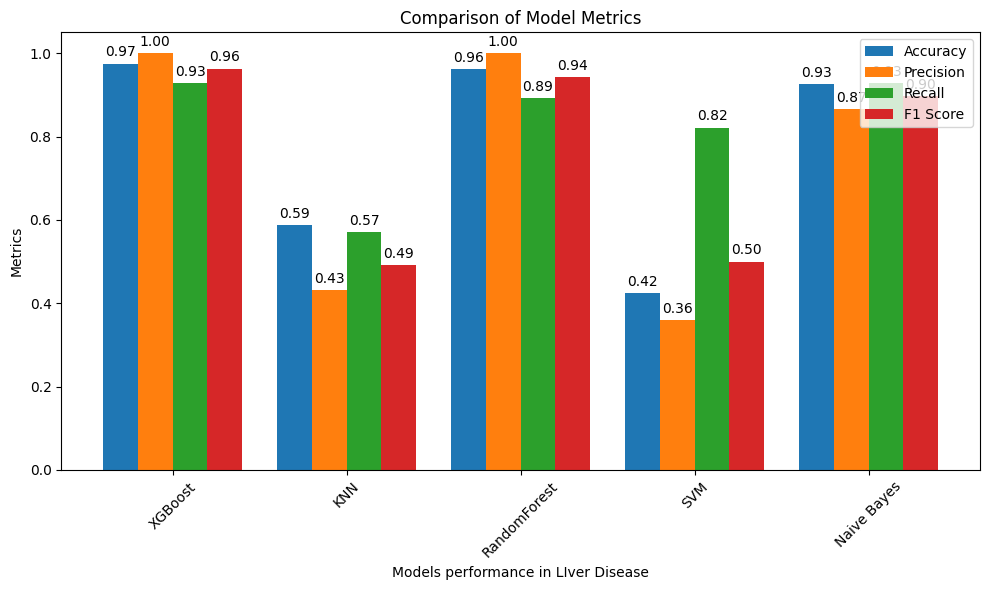

In [ ]:
import matplotlib.pyplot as plt


# Initialize dictionary to store metrics
metrics = {
    "Model": ["XGBoost","KNN","RandomForest","SVM","Naive Bayes"],
    "Accuracy": [xgb_accuracy,knn_accuracy,rf_accuracy,svm_accuracy,nb_accuracy],
    "Precision": [xgb_precision,knn_precision,rf_precision,svm_precision,nb_precision],
    "Recall": [xgb_recall,knn_recall,rf_recall,svm_recall,nb_recall],
    "F1 Score": [xgb_f1,knn_f1,rf_f1,svm_f1,nb_f1]
}


# Convert metrics to NumPy array for plotting
x_labels = metrics["Model"]
accuracy = metrics["Accuracy"]
precision = metrics["Precision"]
recall = metrics["Recall"]
f1 = metrics["F1 Score"]

# Create bar graph
x = np.arange(len(x_labels))  # Label locations
width = 0.2  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - 1.5*width, accuracy, width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, precision, width, label='Precision')
rects3 = ax.bar(x + 0.5*width, recall, width, label='Recall')
rects4 = ax.bar(x + 1.5*width, f1, width, label='F1 Score')

# Add labels, title, and legend
ax.set_xlabel('Models performance in LIver Disease')
ax.set_ylabel('Metrics')
ax.set_title('Comparison of Model Metrics')
ax.set_xticks(x)
ax.set_xticklabels(x_labels, rotation=45)
ax.legend()

# Show values on bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # Offset text above bars
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()
plt.show()
